**<font size=6>降维</font>**

对于每个训练实例，许多机器学习问题涉及成千上万个特征。我们将看到，使用全部特征有时候不仅使训练极其缓慢，而且使寻找好的解决方案变得更加困难。这个问题通常被称为维数的诅咒。

幸运的是，在现实世界中的问题中，通常可以显着减少特征的数量，从而将棘手的问题转变为易于解决的问题。例如，考虑MNIST图像：图像边界上的像素几乎总是白色，因此您可以从训练集中完全删除这些像素而不会丢失太多信息。因为这些像素都与分类任务无关紧要。另外，两个相邻像素通常高度相关：如果将它们合并为一个像素（例如，通过取两个像素强度的平均值），则不会丢失太多信息。

**注意：**<br>
降维确实会造成一些信息丢失（就像将图像压缩为JPEG会降低其质量一样），因此，即使它会加快训练速度，也可能使系统性能稍差。它还使你的pipelines更加复杂，难以维护。因此，如果训练太慢，则应首先考虑使用原始数据训练系统，然后再考虑使用降维。在某些情况下，降维可能会滤除一些噪音和不必要的细节，从而提高性能，但总的来说不会。它将加快训练速度。

除了加快训练速度，降维对于数据可视化（或DataViz）也非常有用。将维数减少到两个（或三个），可以在图形上绘制高维训练集的精简视图，并且通常可以通过视觉检测图案（例如簇）来获得一些重要的见解。此外，DataViz对于将您的结论传达给非数据科学家的人们至关重要，尤其是将使用您的结果的决策者。

在本章中，我们将讨论维数的诅咒，并了解高维空间中发生的事情。然后，我们将考虑两种主要的降维方法（投影和流形学习），并且将介绍三种最流行的降维技术：PCA，内核PCA和LLE。

**<font size=5>一、维数诅咒</font>**

我们已经习惯了在三个维度空间中生活，以至于当我们试图想象一个更高维度的空间时，我们的直觉通常让我们失望。即使是基本的四维超立方体，在我们的脑海中也难以想象（如图所示），更不用说在1000维空间中弯曲的200维椭圆体了。
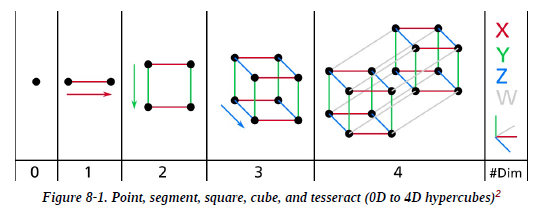

事实证明，许多事物在高维空间中的行为有很大不同。例如，如果您在单位正方形（1×1正方形）中选择一个随机点，则它离边界的距离小于0.001的机会只有0.4％（换句话说， 随机点在任何维度上都是“极值”）。但是在10,000维单位超立方体中，此概率大于99.999999％。高维超立方体中的大多数点都非常靠近边界。

这里有个有趣的事实：如果您考虑到足够的维度，那么您认识的任何人都可能在至少一个维度上是极端主义者（例如，他们在咖啡中放了多少糖）

这是一个更加麻烦的区别：如果您在一个单位正方形中随机选择两个点，则这两个点之间的距离平均约为0.52。如果在一个单位3D立方体中选择两个随机点，则平均距离约为0.66。但是在1,000,000维超立方体中随机选取的两个点又如何呢？好吧，无论您是否相信，平均距离都将约为408.25！这是很违反直觉的：当两个点都位于同一个单元超立方体中时，如何将它们相隔这么远？ 这个事实意味着高维数据集有非常稀疏的风险：大多数训练实例可能彼此相距很远。当然，这也意味着一个新实例可能会与任何训练实例相距甚远，从而使预测比低维预测的可靠性要低得多，因为它们将基于更大的外推法。简而言之，训练集维数越大，过拟合的风险就越大。

从理论上讲，解决维数诅咒的一种方法可能是增加训练集的大小，以达到足够的训练实例密度。不幸的是，在实践中，达到给定密度所需的训练实例数量随维度数量呈指数增长。仅具有100个特征（比MNIST问题要少得多），您需要的训练实例要多于可观察宇宙中的原子，以使训练实例的平均距离彼此在0.1以内，前提是它们在所有维度上均匀分布 。

**<font size=5>二、降维的主要方法</font>**

在深入研究特定的降维算法之前，让我们看一下降低维数的两种主要方法：投影和流形学习。

**<font size=4>投影Projection<font>**

在大多数实际问题中，训练实例并不能均匀地分布在所有维度上。许多特征几乎是恒定不变的，而其他功能则是高度相关的（如之前针对MNIST所述）。因此，所有训练实例实际上都位于（或接近于）高维空间的低维子空间内。这听起来很抽象，所以让我们看一个例子。在下图中，您可以看到由圆圈表示的3D数据集!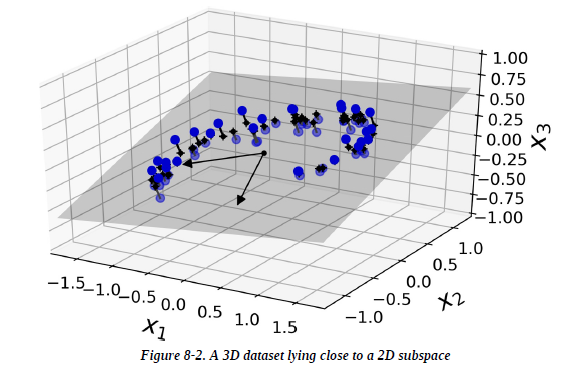

请注意，所有训练实例都位于一个平面附近：这是高维（3D）空间的低维（2D）子空间。如果我们将每个训练实例垂直投影到该子空间上（如将实例连接到平面的短线所示），我们将获得如下图所示的新2D数据集。我们刚刚将数据集的维数从3D减少到2D。请注意，轴对应于新特征z1和z2（平面上投影的坐标）。
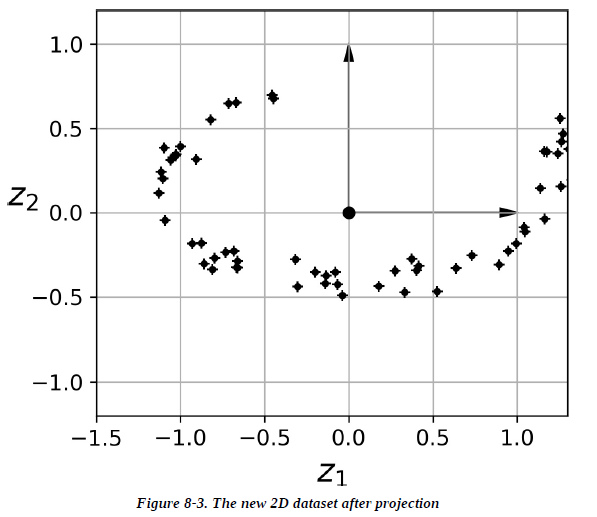

但是，投影并非始终是降维的最佳方法，在许多情况下，子空间可能会发生扭曲和旋转，例如在下图所示的著名的瑞士卷玩具数据集中。
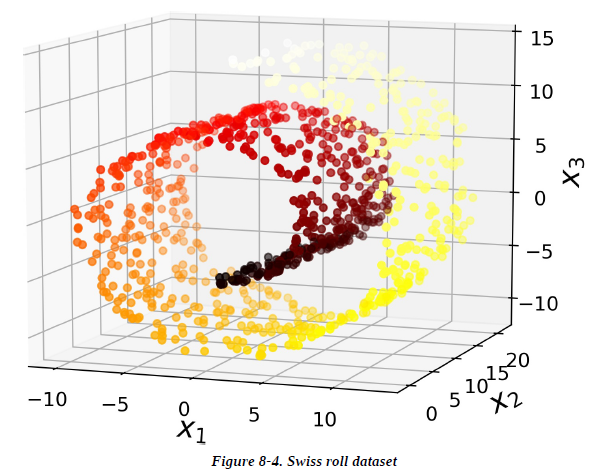

简单地投影到一个平面上（例如，通过舍弃x3）将把瑞士卷的不同层压在一起，如图的左侧所示。您真正想要的是展开Swiss Roll，以获得图右侧的2D数据集。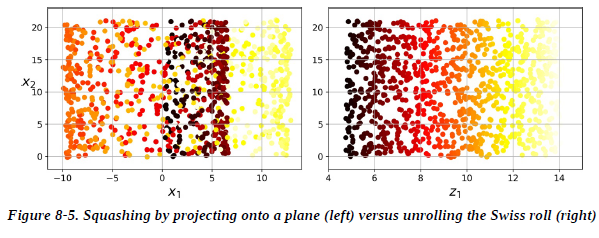

**<font size=4>流形学习<font>**

Swiss Roll是2D流形的一个示例。简而言之，二维流形是可以在更高维度的空间中弯曲和扭曲的二维形状。更一般而言，d维流形是局部类似于d维超平面的n维空间（其中d < n）的一部分。 在使用瑞士卷的情况下，d = 2且n = 3：它局部类似于2D平面，但在第三维中滚动。

许多降维算法通过对训练实例所在的流形进行建模来工作。这称为流形学习。它依赖于流形假设（也称为流形假设），该假设认为大多数现实世界的高维数据集都位于一个非常低维的流形附近。通常根据经验可以观察到这种假设。再次考虑一下MNIST数据集：所有手写数字图像都有一些相似之处。它们由连接的线组成，边框为白色，并且或多或少居中。如果您随机生成图像，那么只有一小部分看起来像手写数字。换句话说，如果您尝试创建数字图像，则可用的自由度大大低于如果允许您生成所需图像的自由度。 这些约束倾向于将数据集压缩为低维流形。

流形假设通常还伴随着另一个隐含假设：手头的任务（例如，分类或回归）如果在流形的较低维空间中表示，将更加简单。例如，在下图的顶行中，瑞士卷分为两类：在3D空间（左侧）中，决策边界将相当复杂，而在2D展开流形空间中（右侧），决策边界是一条直线。

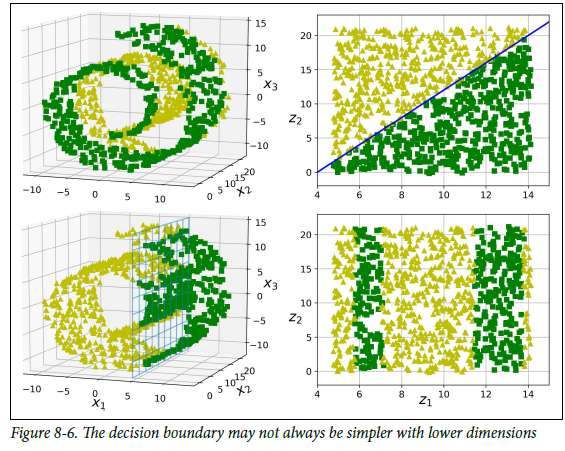

但是，这种假设并不总是成立。例如，在上图的底行中，决策边界位于x1 = 5处。在原始3D空间（垂直平面）中，此决策边界看起来非常简单，但在展开流形中，该决策边界看起来更复杂（ 四个独立线段的集合）。

简而言之，如果您在训练模型之前减小训练集的维数，通常可以加快训练速度，但是不一定总能带来更好或更简单的解决方案。 这一切都取决于数据集。

希望您现在对维数的诅咒有什么了解，以及维数减少算法如何应对它，尤其是在流形假设成立的情况下。

**<font size=5>三、三种主流的降维技术</font>**

**<font size=4>PCA</font>**

主成分分析（PCA）是迄今为止最流行的降维算法。首先，它确定最靠近数据的超平面，然后将数据投影到其上，如图8-2所示。

**保留差异**

在将训练集投影到低维超平面上之前，首先需要选择正确的超平面。例如，简单的2D数据集与三个不同的轴（即1D超平面）一起显示在下图左侧。右边是将数据集投影到每个轴上的结果。如您所见，实线上的投影保留最大方差，而点线上的投影保留很少的方差，而虚线上的投影保留中间的方差量。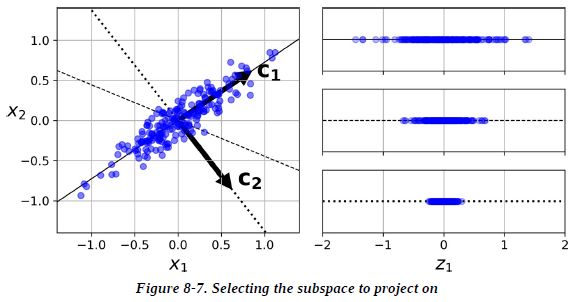

选择保留最大方差量的轴似乎是合理的，因为它很可能会丢失比其他投影更少的信息。证明该选择的另一种方法是，它是使原始数据集与其在该轴上的投影之间的均方距离最小的轴。这是PCA背后相当简单的想法：在最接近空间点系统的直线和平面上。

**主成分**

PCA标识在训练集中占最大方差量的轴。在上图，它是实线。它还找到正交于第一个轴的第二个轴，该轴占最大的剩余方差量。在此2D示例中，别无选择：这是虚线。如果是高维数据集，PCA还将找到与前两个轴正交的第三个轴，以及第四个、第五个等等，与数据集中维数一样多。

第i轴称为数据的第i主成分（PC）。在上图中，第一个主成分是向量c1所在的轴，第二个主成分是向量c2所在的轴。在图8-2中，前两个PC是平面上两个箭头所在的正交轴，第三个PC是与该平面正交的轴。

**<font color="red">提示:</font>**<br>
对于每个主成分，PCA都找到一个指向PC方向的零中心单位向量。由于两个相对的单位向量位于同一轴上，因此PCA返回的单位向量的方向不稳定：如果稍微扰动训练集并再次运行PCA，则单位向量可能指向与原始向量相反的方向。但是，它们通常仍将位于相同的轴上。在某些情况下，一对单位向量甚至可以旋转或交换（如果沿这两个轴的方差接近），但是它们定义的平面通常保持不变。

那么，如何找到训练集的主成分呢？幸运的是，有一种称为奇异值分解（SVD）的标准矩阵分解技术，该技术可以将训练集矩阵X分解为三个矩阵UΣV的矩阵乘法，其中V包含定义我们所有主成分的单位向量。
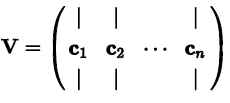

以下Python代码使用NumPy的svd（）函数获取训练集的所有主成分，然后提取前两个主成分的单位向量：

In [1]:
import numpy as np

In [2]:
#首先，创建3D数据集
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

In [4]:
c1 =Vt.T[:,0]
c2 = Vt.T[:,1]

**<font color="red">PCA假定数据集以原点为中心。我们将看到，Scikit Learn的PCA类会为您集中数据。如果您自己实现PCA（如上例所示），或者使用其他库，请不要忘记先将数据去均值化。</font>**

**向下投影到d维**

确定所有主成分后，可以通过将数据集投影到前d个主成分定义的超平面上，将数据集的维数降低到d维。选择此超平面可确保投影将保留尽可能多的方差信息。例如，在图8-2中，将3D数据集投影到由前两个主成分定义的2D平面上，从而保留了数据集大部分的方差。结果，2D投影看起来非常类似于原始3D数据集。

要将训练集投影到超平面上并获得维数为d的简化数据集Xd，训练集矩阵X与矩阵Wd相乘，矩阵Wd定义为包含V的前d列的矩阵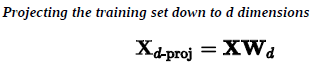

以下Python代码将训练集投影到由前两个主成分定义的平面上：

In [5]:
W2 = Vt.T[:,:2]

In [6]:
Xd = X_centered.dot(W2)

In [7]:
import matplotlib.pyplot as plt

Text(0,0.5,'z2')

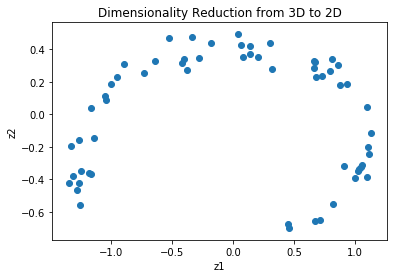

In [8]:
plt.scatter(Xd[:,0], Xd[:,1])
plt.title("Dimensionality Reduction from 3D to 2D")
plt.xlabel("z1")
plt.ylabel("z2")

拥有它！您现在知道了如何将任何数据集的维数减少到任意数量的维数，同时保留尽可能多的方差信息。

**使用sklearn**

就像我们在本章前面所做的那样，Scikit-Learn的PCA类使用SVD分解来实现PCA。以下代码应用PCA将数据集的维数降低到二维（请注意，它会自动处理数据去均值化的问题）：

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
X2D = pca.fit_transform(X)

In [12]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [13]:
Xd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

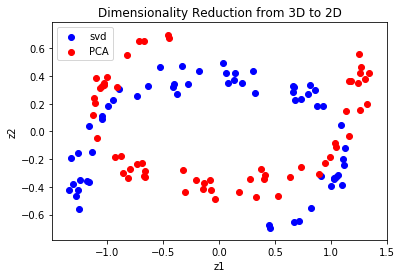

In [14]:
plt.scatter(Xd[:,0], Xd[:,1], color="b", label="svd")
plt.scatter(X2D[:,0], X2D[:,1], color="r", label="PCA")
plt.title("Dimensionality Reduction from 3D to 2D")
plt.xlabel("z1")
plt.ylabel("z2")
plt.legend()

**好像有些不太一样的感觉？发生了什么**<br>
请注意，在略有不同的数据集上多次运行PCA可能会导致不同的结果。通常，唯一的区别是某些轴可能会翻转。在此示例中，使用Scikit Learn的PCA给出的投影与SVD方法给出的投影相同，只是两个轴都被翻转了.

In [15]:
np.allclose(X2D, -Xd)

True

恢复投影在平面上的3D点（PCA 2D子空间）

In [16]:
X3D_inv = pca.inverse_transform(X2D)

当然，在投影步骤中会丢失一些信息，因此恢复的3D点并不完全等于原始3D点

In [17]:
np.allclose(X3D_inv, X)

False

计算重建误差：

In [18]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

svd中的逆变换：

In [19]:
X3D_inv_using_svd = Xd.dot(Vt[:2, :])

两种方法的重构都不相同，因为Scikit-Learn的PCA类会自动处理均值居中的问题，但是如果减去均值，我们将得到相同的重构：

In [20]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

将PCA转换器拟合到数据集后，其component_属性将保留W的转置（例如，定义第一个主成分的单位向量等于pca.components_.T[:,0]）。

**解释方差比**

另一个有用的信息是每个主成分的解释方差比，可通过explained_variance_ratio_变量获得。该比率表示沿每个主成分分布的数据集方差的比例。例如，让我们看一下图8-2中所示的3D数据集的前两个主成分的解释方差比：

In [21]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

从输出结果中科院发现，数据集方差的84.2％位于第一个主成分上，而14.6％位于第二个主成分上。对于第三个主成分，这还不到1.2％，因此可以合理地假设第三个主成分可能携带的信息很少。

**选择正确的维数**

与其任意选择要减小到的维数，不如选择相加足够大的方差（例如95％）的维数。当然，除非您要降低数据可视化的维数，否则，您将需要将维数降低到2或3。

以下代码在不降低维度的情况下执行了PCA，然后计算了保留95％训练集方差所需的最小维度数：

In [22]:
from sklearn.datasets import load_digits

In [23]:
mnist = load_digits()

In [24]:
data, target = mnist.data, mnist.target

In [25]:
target[:2]

array([0, 1])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [28]:
pca = PCA()

In [29]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**numpy.cumsum(array, axis=)**<br>
按照给定的axis参数，返回元素的梯形累加和。axis=0，按行累加，axis=1，按列累加。如果不给定axis的值，默认将array看为一维的numpy数组。

In [30]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [31]:
cumsum

array([0.14713399, 0.28412996, 0.40314777, 0.48881688, 0.54631867,
       0.59540865, 0.63751325, 0.67423866, 0.70650419, 0.73763096,
       0.76138618, 0.78417895, 0.80261382, 0.82056828, 0.83530737,
       0.84954419, 0.86325848, 0.87552276, 0.88552575, 0.89452128,
       0.90346254, 0.91150068, 0.91934557, 0.9263354 , 0.93314127,
       0.93915576, 0.9449681 , 0.95021391, 0.95506469, 0.95914935,
       0.9628809 , 0.96641468, 0.96983983, 0.97317156, 0.97627797,
       0.97913668, 0.98164135, 0.98389765, 0.98611079, 0.988148  ,
       0.99001028, 0.99157485, 0.99309701, 0.99453434, 0.99573323,
       0.99679757, 0.99776442, 0.99863046, 0.99919555, 0.99959509,
       0.99980093, 0.99987717, 0.99992803, 0.99996896, 0.99998697,
       0.99999314, 0.99999852, 0.99999938, 0.99999997, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [32]:
d = np.argmax(cumsum >= 0.95)+1
d

28

然后，您可以设置n_components=d并再次运行PCA。但是，还有一个更好的选择：您可以将n_components设置为0.0到1.0之间的浮点数，而不是指定要保留的主成分数，以指示要保留的方差比率：

In [33]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

另一个选择是将解释的方差绘制为维数的函数（简单地绘制累积；见下图）。曲线上通常会有一个弯头，其中解释的方差停止快速增长。在这种情况下，您可以看到将维度降低到大约28个维度不会损失太多的解释差异。

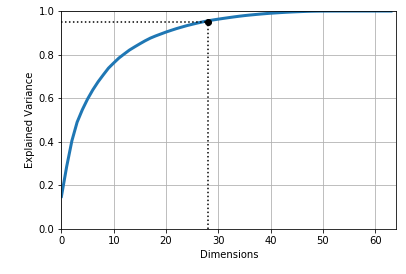

In [34]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 64, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

**PCA压缩**

降维后，训练集占用的空间要少得多。例如，尝试将PCA应用于digits数据集，同时保留其95％的方差。您应该发现每个实例将具有28个特征，而不是原始的64个特征。因此，尽管保留了大多数方差，但数据集现在不到其原始大小的50％！这是一个合理的压缩率，您可以看到这种维度减小如何极大地加速分类算法（例如SVM分类器）

通过应用PCA投影的逆变换，还可以将缩小的数据集解压缩回64个维度。由于投影会丢失一些信息（在掉落的5％偏差之内），所以这不会给您返回和原始数据一样的数据，但是它很可能接近原始数据。原始数据与重构数据（压缩后再解压缩）之间的均方距离称为重构误差。

以下代码将digits数据集压缩为40个维度，然后使用inverse_transform（）方法将其解压缩为64个维度：

In [35]:
pca = PCA(n_components=40)

In [36]:
X_reduced = pca.fit_transform(X_train)

In [37]:
X_recovered = pca.inverse_transform(X_reduced)

In [38]:
digit = X_train[0]
digit_recovered = X_recovered[0]

In [39]:
digit = digit.reshape(8,8)
digit_recovered = digit_recovered.reshape(8,8)

In [40]:
import matplotlib as mpl

(-0.5, 7.5, 7.5, -0.5)

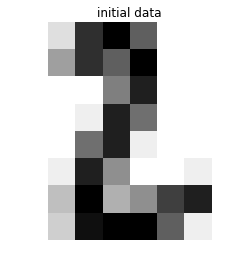

In [41]:
plt.imshow(digit, cmap = mpl.cm.binary, interpolation="nearest")
plt.title("initial data")
plt.axis("off")

(-0.5, 7.5, 7.5, -0.5)

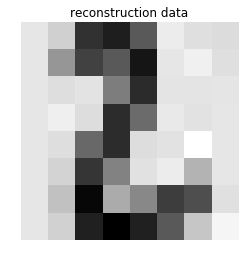

In [42]:
plt.imshow(digit_recovered, cmap = mpl.cm.binary, interpolation="nearest")
plt.title("reconstruction data")
plt.axis("off")

下图显示了原始训练集的一些数字（左侧），以及压缩和解压缩后的相应数字。您会看到图像质量略有下降，但数字仍然大部分保持完好无损。
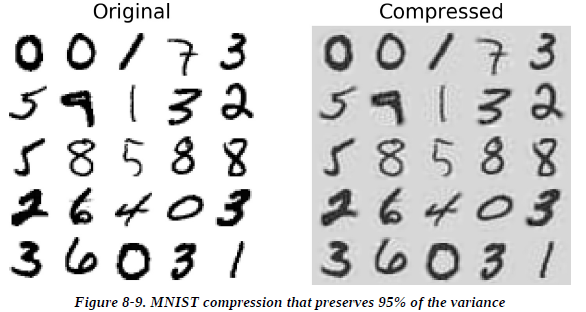

逆变换的公式如下所示：
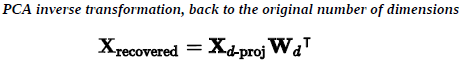

**随机PCA**

如果将svd_solver超参数设置为“randomized”，则Scikit-Learn将使用一种名为Randomized-PCA的随机算法，该算法可以快速找到前d个主成分的近似值。它的计算复杂度为O（m×d2）+ O（d3），而不是完整SVD方法的O（m×n2）+ O（n3），因此，当d远小于n时，它比完整SVD快得多 ：

In [43]:
rnd_pca = PCA(n_components = 40, svd_solver="randomized")

In [44]:
X_reduced2 = rnd_pca.fit_transform(X_train)

In [45]:
X_reduced2[:,:5]

array([[ -8.53123636,  -1.36940558,  26.32596407,  -1.7217427 ,
         -5.18895902],
       [-13.63135813,   9.54843054,   3.32552636,  -5.04146485,
         -3.57132384],
       [ -4.66400621,  -1.23523688,   8.44713353,  -9.71181523,
         -6.51173481],
       ...,
       [ 16.41211929,   7.27761624, -20.26941701,  -5.98449913,
         14.46940999],
       [ -2.07282546, -15.84188254, -17.04772173,  11.95614207,
        -11.27032769],
       [ 10.15862459,  -4.41576659,  23.87108644,  -3.25061669,
         13.66706857]])

In [46]:
X_reduced[:,:5]

array([[ -8.53123636,  -1.36940558,  26.32596407,  -1.7217427 ,
         -5.18895902],
       [-13.63135813,   9.54843054,   3.32552636,  -5.04146485,
         -3.57132384],
       [ -4.66400621,  -1.23523688,   8.44713353,  -9.71181523,
         -6.51173481],
       ...,
       [ 16.41211929,   7.27761624, -20.26941701,  -5.98449913,
         14.46940999],
       [ -2.07282546, -15.84188254, -17.04772173,  11.95614207,
        -11.27032769],
       [ 10.15862459,  -4.41576659,  23.87108644,  -3.25061669,
         13.66706857]])

默认情况下，svd_solver实际上设置为“auto”：如果m或n大于500并且d小于m或n的80％，则Scikit-Learn自动使用随机PCA算法，否则它将使用完整的SVD方法。如果要强制Scikit-Learn使用完整的SVD，则可以将svd_solver超参数设置为“ full”。

**增量PCA**

前面的PCA实现的一个问题是，它们要求整个训练集都适合内存，才能运行算法。幸运的是，已经开发了增量PCA（IPCA）算法。 它们使您可以将训练集划分为多个小批量，并一次向IPCA算法注入一个小批量。这对于大型训练集和在线学习（即在新实例到来时即时）应用PCA很有用。

以下代码将digits数据集拆分为20个小批量（使用NumPy的array_split（）函数），并将其馈送至Scikit-Learn的IncrementalPCA类，以将MNIST数据集的维数降低至40维（与之前一样）。请注意，您必须在每个迷你批处理中调用partial_fit()方法，而不是在整个训练集中调用fit（）方法：

In [47]:
from sklearn.decomposition import IncrementalPCA

In [48]:
n_batches = 20

In [49]:
inc_pca = IncrementalPCA(n_components=40)

In [50]:
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [51]:
X_reduced3 = inc_pca.transform(X_train)

另外，您可以使用NumPy的memmap类，该类使您可以操纵存储在磁盘上的二进制文件中的大型数组，就好像它完全在内存中一样。该类仅在需要时才将其需要的数据加载到内存中。由于IncrementalPCA类在任何给定时间仅使用数组中的一小部分，因此内存使用情况处于受控状态。如下面的代码所示，这使得可以调用常规的fit（）方法：
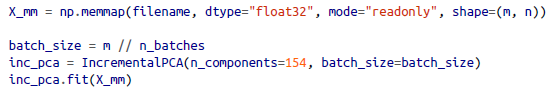

**<font size=4>核PCA</font>**

之前，我们讨论了内核技巧，这是一种数学技术，可将实例隐式映射到一个高维空间（称为特征空间），从而可以通过支持向量机进行非线性分类和回归。回想一下，高维特征空间中的线性决策边界对应于原始空间中的复杂非线性决策边界。

事实证明，可以将相同的技巧应用于PCA，从而可以执行复杂的非线性投影以降低维度。这称为内核PCA（kPCA）。通常，它擅长于在投影后保留实例集群，有时甚至可以展开位于扭曲流形附近的数据集。

以下代码使用Scikit-Learn的KernelPCA类通过RBF内核执行kPCA

In [52]:
#生成swiss_roll数据集
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

**<font color="red">必须要导入这个包，不然运行会报错</font>**

In [53]:
from mpl_toolkits.mplot3d import axes3d

In [54]:
axes = [-11.5, 14, -2, 23, -12, 15]

In [55]:
import matplotlib as mpl

In [56]:
%matplotlib inline

Text(0.5,0.92,'swiss roll 3d Fig')

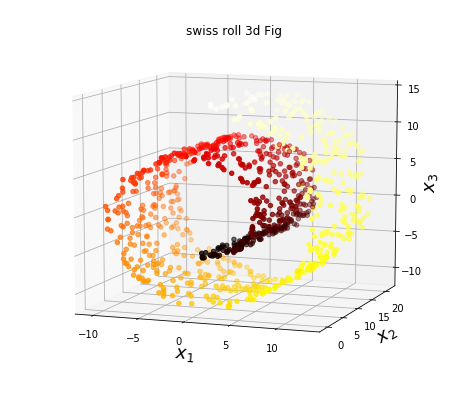

In [57]:
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
ax.set_title("swiss roll 3d Fig")

In [58]:
from sklearn.decomposition import KernelPCA

下图显示了瑞士卷，它使用线性核（相当于简单地使用PCA类）、RBF核和Sigmoid核减小为二维。

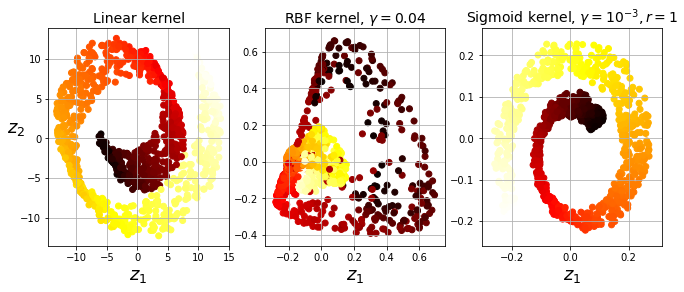

In [59]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

**选择内核并调整超参数**

由于kPCA是一种无监督的学习算法，因此没有明显的性能指标可帮助您选择最佳内核和超参数值。就是说，降维通常是有监督学习任务（例如分类）的准备步骤，因此您可以使用网格搜索来选择可在该任务上获得最佳性能的内核和超参数。以下代码创建了一个两步pipeline，首先使用kPCA将维数减少到二维，然后将Logistic回归应用于分类。然后，它使用GridSearchCV查找kPCA的最佳内核和gamma值，以便在管道末端获得最佳分类精度：

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [80]:
clf = Pipeline([("kpca", KernelPCA(n_components=2)),("log_reg", LogisticRegression(solver="lbfgs"))])

In [81]:
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

In [82]:
grid_search = GridSearchCV(clf, param_grid, cv=3)

In [83]:
X.shape

(1000, 3)

In [84]:
y.shape

(1000,)

In [85]:
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

然后，可以通过best_params_属性获得最佳内核和超参数：

In [86]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

这次完全不受监督的另一种方法是选择产生最低重构误差的内核和超参数。请注意，重建并不像使用线性PCA那样容易。这就是为什么。下图显示了原始的瑞士卷3D数据集（左上）和使用RBF内核应用kPCA之后的结果2D数据集（右上）。多亏了内核技巧，此变换在数学上等效于使用特征图φ将训练集映射到无限维特征空间（右下），然后使用线性PCA将变换后的训练集投影到二维空间。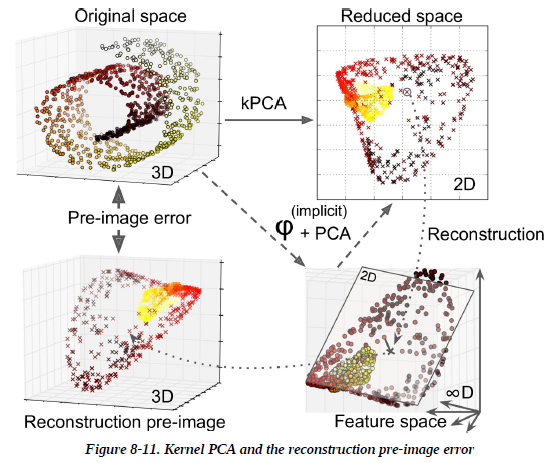

请注意，如果我们可以在降维空间中反转给定实例的线性PCA步骤，则重构点将位于特征空间中，而不是原始空间中（例如，如图中X所代表的那样）。由于特征空间是无限维的，因此无法计算重构点，因此无法计算真实的重构误差。幸运的是，有可能在原始空间中找到一个点，该点将映射到重建点附近。这一点称为重建原像。获得该原像后，您可以测量其与原始实例的平方距离。然后，您可以选择内核和超参数，以最大程度地减少此重建原像错误。

您可能想知道如何执行此重构。一种解决方案是训练有监督的回归模型，其中将投影实例作为训练集，而将原始实例作为目标。如果设置fit_inverse_transform = True，Scikit-Learn将自动执行此操作，如以下代码所示：

In [87]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)

In [88]:
X_reduced = rbf_pca.fit_transform(X)

In [89]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

**<font color="red">默认情况下，fit_inverse_transform = False，并且KernelPCA没有inverse_transform（）方法。仅当您设置fit_inverse_transform = True时，才会创建此方法。</font>**

计算重构原像的重建误差：

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
mean_squared_error(X_preimage, X)

32.786308795766104

现在，您可以将网格搜索与交叉验证结合使用，以找到可最大程度减少此错误的内核和超参数。

**<font size=4>LLE</font>**

局部线性嵌入（LLE）是另一种强大的非线性降维（NLDR）技术。它是一种流形学习技术，不像以前的算法那样依赖于投影。简而言之，LLE的工作方式是首先测量每个训练实例如何与其最近的邻居线性相关（c.n.），然后寻找可以最好地保留这些局部关系的训练集的低维表示形式（稍后会详细介绍）。这种方法特别适合展开扭曲的流形，尤其是在没有太多噪声的情况下。

以下代码使用Scikit-Learn的LocallyLinearEmbedding类展开瑞士卷：

In [119]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [120]:
from sklearn.manifold import LocallyLinearEmbedding

In [121]:
X.shape

(1000, 3)

In [122]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
X_reduced = lle.fit_transform(X)

生成的2D数据集如图所示。如您所见，瑞士卷已完全展开，并且实例之间的局部距离得到了很好的保留。但是，距离并没有更大范围地保留：展开的瑞士卷的左侧部分被拉伸，而右侧部分被挤压。尽管如此，LLE在流形建模方面做得很好。

In [123]:
X_reduced.shape

(1000, 2)

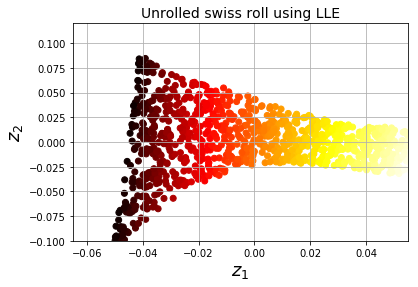

In [124]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

LLE的工作方式如下：对于每个训练实例Xi，算法都会识别出它的k个最近邻居（在前面的代码k = 10中），然后尝试将Xi重建为这些邻居的线性函数。更具体地说，它找到权重w，使得xi和
之间的平方距离尽可能小，如果xj不是xi的k个最接近的邻居之一，则wi,j = 0。因此，LLE的第一步是下列公式中描述的约束优化问题，其中W是包含所有权重w的权重矩阵。第二个约束条件只是简单地标准化了每个训练实例xi的权重。

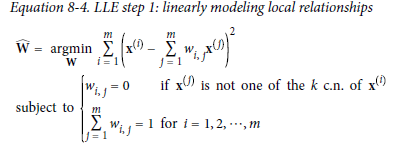

在此步骤之后，权重矩阵W（包含权重wi,j）对训练实例之间的局部线性关系进行编码。现在第二步是将训练实例映射到d维空间（其中d <n），同时尽可能保留这些局部关系。如果zi是此d维空间中Xi的图像，则我们希望zi与

之间的平方距离尽可能小。这种想法导致了下列公式中描述的无约束优化问题。它看起来与第一步非常相似，但是与保持实例固定并找到最佳权重相反，我们进行了相反的操作:保持权重固定并在低维空间中找到实例图像的最佳位置。注意，Z是包含所有zi的矩阵。

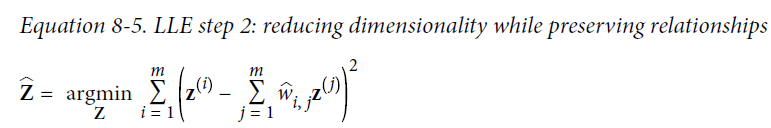

Scikit-Learn的LLE实现具有以下计算复杂度：O（m log（m）n log（k））用于找到k个最近的邻居，O（mnk）用于优化权重，O（dm2）用于构造低维表示。不幸的是，最后一项中的m使该算法很难扩展到非常大的数据集。

**<font size=5>四、其他降维技术</font>**

还有许多其他降维技术，Scikit-Learn中提供了其中几种。以下是一些最受欢迎的：

**随机投影**<br>
顾名思义，使用随机线性投影将数据投影到较低维的空间。这听起来可能很疯狂，但是事实证明，这样的随机投影实际上很可能很好地保持距离，正如威廉·约翰逊和乔拉姆·林登斯特劳斯在著名引理中的数学证明。降维的质量取决于实例数和目标维数，但令人惊讶的是，不取决于初始维数。

**多维缩放(MDS)**<br>
尝试保留实例之间的距离时降维。

**Isomap**<br>
通过将每个实例与其最近的邻居连接来创建图，然后在尝试保留实例之间的测地距离(图中两个节点之间的测地距离是这些节点之间最短路径上的节点数)的同时降低维数

**t分布随机邻居嵌入（t-SNE）**<br>
t分布随机邻居嵌入（t-SNE）降低了维数，同时尝试使相似实例相邻而异质实例保持分开。它主要用于可视化，尤其是在高维空间中可视化实例集群（例如，以2D可视化MNIST图像）。

**线性判别分析LDA**<br>
线性判别分析（LDA）实际上是一种分类算法，但是在训练过程中，它会学习各类之间最具判别力的轴，然后可以使用这些轴定义将数据投影到的超平面。这样做的好处是，投影将使类保持尽可能远的距离，因此LDA是在运行其他分类算法（例如SVM分类器）之前降低维数的好技术。

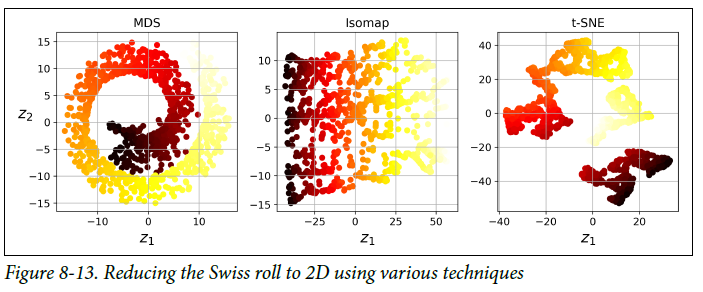